In [928]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import pickle
import plotly.graph_objs as pg
import plotly
import plotly.plotly as py
from scipy import stats
import plotly.graph_objs as go

In [929]:
df = pd.read_pickle('USJH.pkl')

In [930]:
df.dtypes

Unnamed: 0                       int64
name                            object
financial_status                object
paid_at                         object
fulfillment_status              object
accepts_marketing               object
currency                        object
subtotal                       float64
shipping                       float64
taxes                          float64
total                          float64
discount_code                   object
discount_amount                float64
shipping_method                 object
created_at                      object
lineitem_quantity                int64
lineitem_name                   object
lineitem_price                 float64
lineitem_compare_at_price      float64
lineitem_sku                    object
lineitem_fulfillment_status     object
shipping_street                 object
shipping_address1               object
shipping_company                object
shipping_city                   object
shipping_zip             

In [931]:
df.category.value_counts()

earring        34861
necklace       30837
bracelet       10226
apparel         3574
ring            1839
accessories     1439
other            733
Name: category, dtype: int64

In [932]:
df.shape

(83509, 37)

In [933]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['Unnamed: 0', 'lineitem_quantity', 'cancelled'], dtype='object'),
 dtype('float64'): Index(['subtotal', 'shipping', 'taxes', 'total', 'discount_amount',
        'lineitem_price', 'lineitem_compare_at_price', 'refunded_amount'],
       dtype='object'),
 dtype('O'): Index(['name', 'financial_status', 'paid_at', 'fulfillment_status',
        'accepts_marketing', 'currency', 'discount_code', 'shipping_method',
        'created_at', 'lineitem_name', 'lineitem_sku',
        'lineitem_fulfillment_status', 'shipping_street', 'shipping_address1',
        'shipping_company', 'shipping_city', 'shipping_zip',
        'shipping_province', 'shipping_country', 'notes', 'payment_method',
        'vendor', 'risk_level', 'source', 'color', 'category'],
       dtype='object')}

Missing value percentage

In [934]:
df.isna().sum(axis = 0).sort_values(ascending = False)/85925

lineitem_sku                   0.492476
shipping_company               0.000268
category                       0.000000
taxes                          0.000000
created_at                     0.000000
shipping_method                0.000000
discount_amount                0.000000
discount_code                  0.000000
total                          0.000000
shipping                       0.000000
lineitem_name                  0.000000
subtotal                       0.000000
currency                       0.000000
accepts_marketing              0.000000
fulfillment_status             0.000000
paid_at                        0.000000
financial_status               0.000000
name                           0.000000
lineitem_quantity              0.000000
lineitem_compare_at_price      0.000000
lineitem_price                 0.000000
notes                          0.000000
source                         0.000000
risk_level                     0.000000
vendor                         0.000000


In [935]:
df.groupby('name').agg(sum).tail(15)

,Unnamed: 0,subtotal,shipping,taxes,total,discount_amount,lineitem_quantity,lineitem_price,lineitem_compare_at_price,cancelled,refunded_amount
name,,,,,,,,,,,
#4732,5971,2100.00,146.58,0.00,2246.58,0.00,34,61.25,61.25,14,0.00
#4733,7389,4554.00,0.00,0.00,4554.00,0.00,69,69.75,72.50,18,53.25
#4734,16698,15785.00,0.00,70.40,15855.40,0.00,76,219.75,220.50,44,44.00
#4735,8957,3633.50,336.96,0.00,3970.46,0.00,32,119.50,119.50,26,8.50
#4736,30193,110773.43,0.00,0.00,110773.43,53.48,202,626.25,638.25,109,0.00
#4737,6032,44115.67,0.00,0.00,44115.67,169.02,135,348.75,348.75,29,0.00
#4738,385,11.50,20.94,0.00,32.44,0.00,2,5.75,5.75,2,0.00
#4739,381,152.00,20.94,0.00,172.94,0.00,2,76.00,76.00,2,0.00
#4740,3249,4747.50,0.00,0.00,4747.50,0.00,47,101.50,101.50,18,0.00


In [936]:
df.groupby(['name','vendor']).agg(sum).tail(15)

Unnamed: 0  subtotal  shipping  taxes    total  \
name  vendor                                                             
#4744 lamant                    55    399.75      0.00    0.0   399.75   
      pink collection           63    399.75      0.00    0.0   399.75   
      ruff-skch                 57    399.75      0.00    0.0   399.75   
#4745 cloie                    168   1365.00     90.72    0.0  1455.72   
      moment                   217   1365.00     90.72    0.0  1455.72   
      ruff-skch                 35    195.00     12.96    0.0   207.96   
#4746 andante                   18    100.50     13.64    0.0   114.14   
      cloie                     73    502.50     68.20    0.0   570.70   
      ella                      17    201.00     27.28    0.0   228.28   
      fresh                      8    100.50     13.64    0.0   114.14   
      impression                 2    100.50     13.64    0.0   114.14   
      it's sense                44    301.50     40.92    0.0   342.42   
      stylist                    4    100.50     13.64    0.0   114.14   
      us jewelry house           1    201.00     27.28    0.0   228.28   
      usjewelryhouse            43    502.50     68.20    0.0   570.70   

                        discount_amount  lineitem_quantity  lineitem_price  \
name  vendor                                                                 
#4744 lamant                        0.0                  2            4.25   
      pink collection               0.0                  4            3.25   
      ruff-skch                     0.0                  2           10.50   
#4745 cloie                         0.0                 35           14.00   
      moment                        0.0                 31           24.00   
      ruff-skch                     0.0                  3            6.00   
#4746 andante                       0.0                  1            5.00   
      cloie                         0.0                  6           17.00   
      ella                          0.0                  2           12.50   
      fresh                         0.0                  1            5.00   
      impression                    0.0                  1           10.50   
      it's sense                    0.0                  4           13.25   
      stylist                       0.0                  1            5.25   
      us jewelry house              0.0                  2            6.75   
      usjewelryhouse                0.0                  5           16.50   

                        lineitem_compare_at_price  cancelled  refunded_amount  
name  vendor                                                                   
#4744 lamant                                 4.25          1              0.0  
      pink collection                        3.25          1              0.0  
      ruff-skch                             10.50          1              0.0  
#4745 cloie                                 32.75          7              0.0  
      moment                                34.50          7              0.0  
      ruff-skch                              6.00          1              0.0  
#4746 andante                                5.00          1              0.0  
      cloie                                 17.00          5              0.0  
      ella                                  12.50          2              0.0  
      fresh                                  5.00          1              0.0  
      impression                            10.50          1              0.0  
      it's sense                            13.25          3              0.0  
      stylist                                5.25          1              0.0  
      us jewelry house                       6.75          2              0.0  
      usjewelryhouse                        17.00          5              0.0

In [937]:
df.groupby(['name','vendor','lineitem_fulfillment_status']).sum().tail(15)

Unnamed: 0  subtotal  \
name  vendor           lineitem_fulfillment_status                         
#4744 lamant           pending                              55    399.75   
      pink collection  pending                              63    399.75   
      ruff-skch        pending                              57    399.75   
#4745 cloie            pending                             168   1365.00   
      moment           pending                             217   1365.00   
      ruff-skch        pending                              35    195.00   
#4746 andante          pending                              18    100.50   
      cloie            pending                              73    502.50   
      ella             pending                              17    201.00   
      fresh            pending                               8    100.50   
      impression       pending                               2    100.50   
      it's sense       pending                              44    301.50   
      stylist          pending                               4    100.50   
      us jewelry house pending                               1    201.00   
      usjewelryhouse   pending                              43    502.50   

                                                    shipping  taxes    total  \
name  vendor           lineitem_fulfillment_status                             
#4744 lamant           pending                          0.00    0.0   399.75   
      pink collection  pending                          0.00    0.0   399.75   
      ruff-skch        pending                          0.00    0.0   399.75   
#4745 cloie            pending                         90.72    0.0  1455.72   
      moment           pending                         90.72    0.0  1455.72   
      ruff-skch        pending                         12.96    0.0   207.96   
#4746 andante          pending                         13.64    0.0   114.14   
      cloie            pending                         68.20    0.0   570.70   
      ella             pending                         27.28    0.0   228.28   
      fresh            pending                         13.64    0.0   114.14   
      impression       pending                         13.64    0.0   114.14   
      it's sense       pending                         40.92    0.0   342.42   
      stylist          pending                         13.64    0.0   114.14   
      us jewelry house pending                         27.28    0.0   228.28   
      usjewelryhouse   pending                         68.20    0.0   570.70   

                                                    discount_amount  \
name  vendor           lineitem_fulfillment_status                    
#4744 lamant           pending                                  0.0   
      pink collection  pending                                  0.0   
      ruff-skch        pending                                  0.0   
#4745 cloie            pending                                  0.0   
      moment           pending                                  0.0   
      ruff-skch        pending                                  0.0   
#4746 andante          pending                                  0.0   
      cloie            pending                                  0.0   
      ella             pending                                  0.0   
      fresh            pending                                  0.0   
      impression       pending                                  0.0   
      it's sense       pending                                  0.0   
      stylist          pending                                  0.0   
      us jewelry house pending                                  0.0   
      usjewelryhouse   pending                                  0.0   

                                                    lineitem_quantity  \
name  vendor           lineitem_fulfillment_status                      
#4744 lamant           pending              

## Calculate revenue

In [938]:
# fill na Discount amount na meaning it's 0
df['discount_amount'].fillna(0, inplace=True)

In [939]:
# fill na Refunded Amount na meaning it's 0
df['refunded_amount'].fillna(0, inplace=True)

In [940]:
df['revenue'] = df["subtotal"] - df["discount_amount"] - df["refunded_amount"]

In [941]:
# fill na Subtotal na meaning it's 0
df['subtotal'].fillna(0, inplace=True)

#### Top vendors - sales

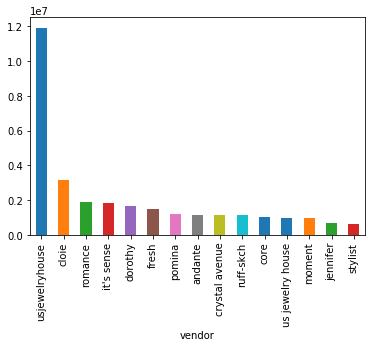

In [942]:
#plt.figure(figsize=(15,10))
df.groupby('vendor').sum()['subtotal'].sort_values(ascending = False).head(15).plot(kind = 'bar')

In [943]:
data = [go.Bar(x= df.vendor,
            y=df.subtotal)]

py.iplot(data, filename='jupyter-basic_bar')

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Top vedors - Refund 

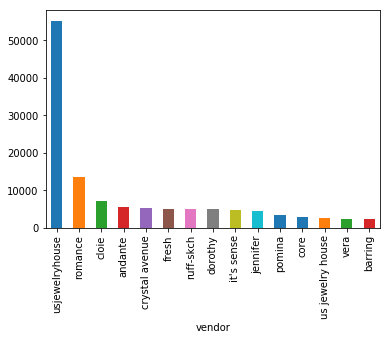

In [944]:
df.groupby('vendor').sum()['refunded_amount'].sort_values(ascending = False).head(15).plot(kind = 'bar')

#### Top vedors - Revenue

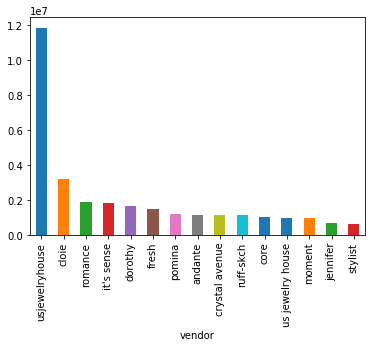

In [945]:
df.groupby('vendor').sum()['revenue'].sort_values(ascending = False).head(15).plot(kind = 'bar')

In [946]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [947]:
df['month'] = df['created_at'].dt.month

In [948]:
df['year'] = df['created_at'].dt.year

In [949]:
df['day'] = df['created_at'].dt.day

In [950]:
df['time'] = pd.to_datetime(df['created_at'], format='%m/%d/%y %H:%M').dt.hour

In [951]:
df['day_of_week'] = df['created_at'].dt.weekday_name

### Top sales by day of week

In [952]:
daydf=df.groupby('day_of_week', as_index= False).sum().sort_values(by = 'subtotal', ascending = False)

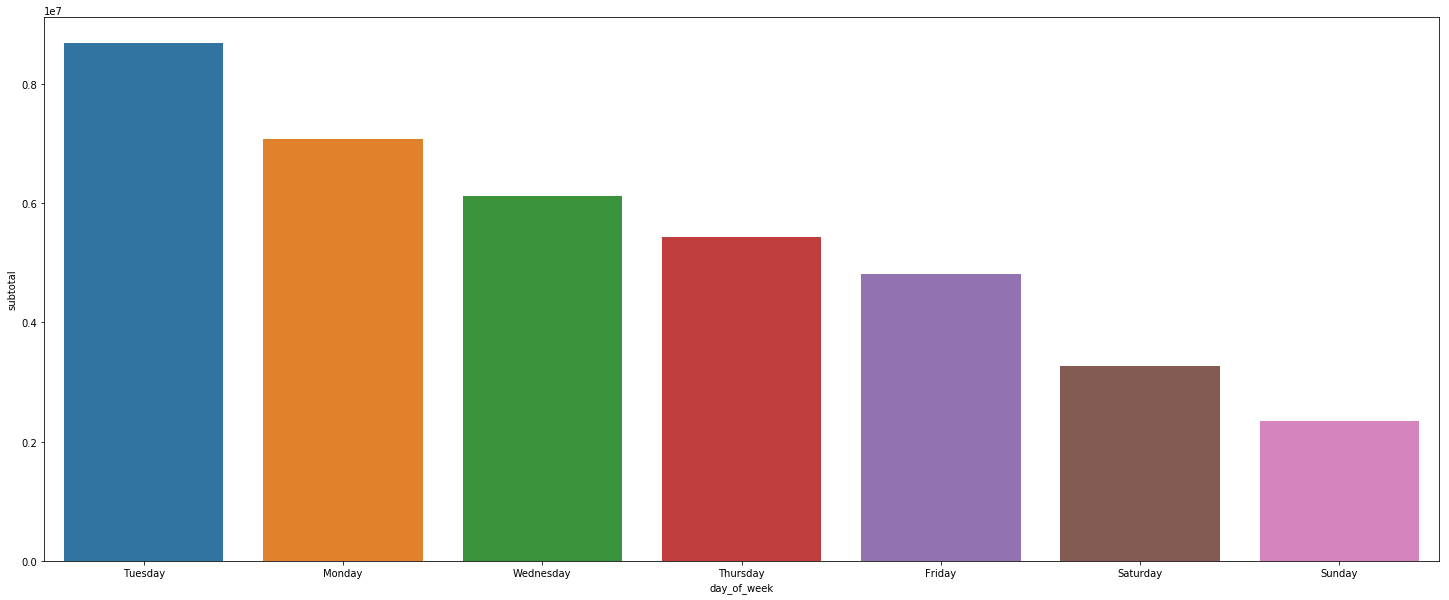

In [953]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'day_of_week', y = 'subtotal', data = daydf)

### Top sales by day of week and year

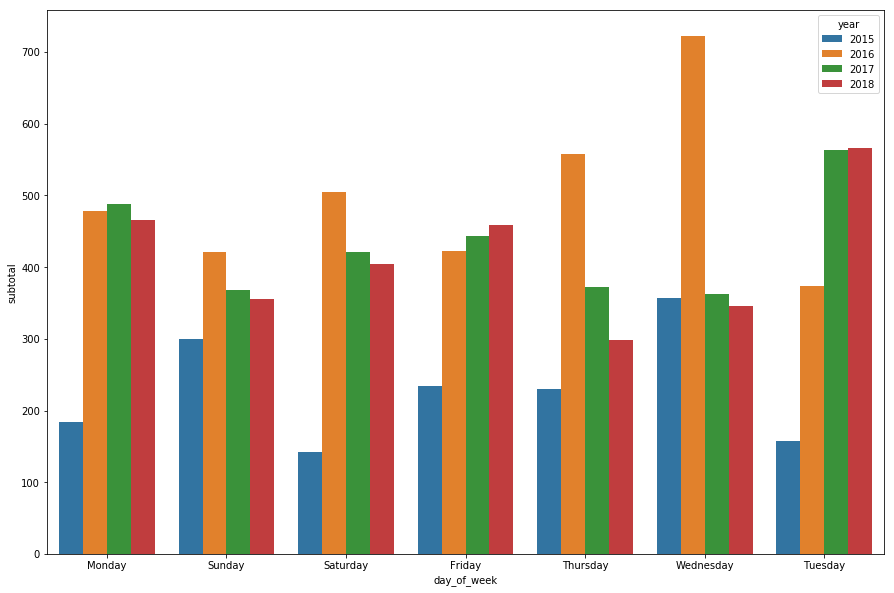

In [954]:
plt.figure(figsize=(15,10))
sns.barplot(x="day_of_week", y="subtotal", hue="year",ci=None,data=df)

### Top revenue by day of week

In [955]:
day_of_weekdf=df.groupby('day_of_week', as_index= False).sum().sort_values(by = 'revenue', ascending = False)

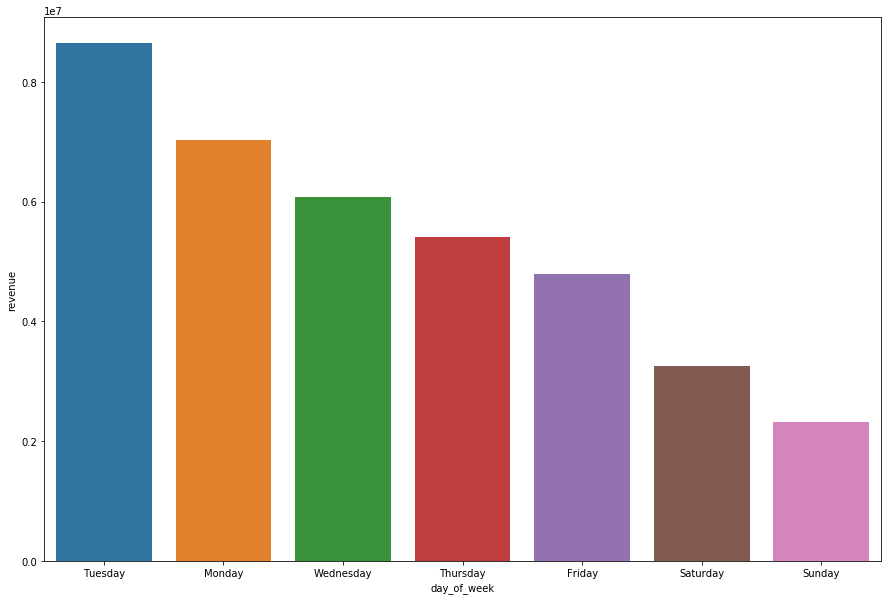

In [956]:
plt.figure(figsize=(15,10))
sns.barplot(x="day_of_week", y="revenue",ci=None,data=day_of_weekdf)

#### Hours that converts sales

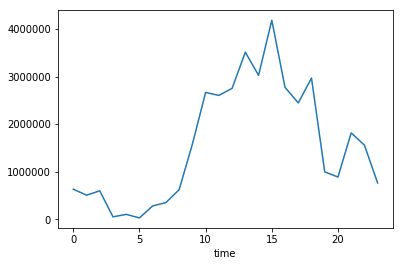

In [957]:
df.groupby('time')['subtotal'].sum().plot()

#### Monthly sales from 2015 to 2018

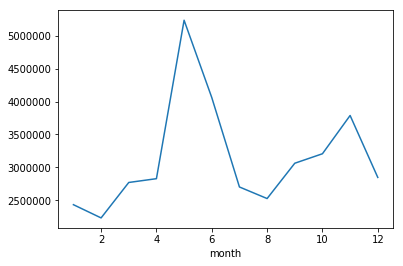

In [958]:
df.groupby('month')['subtotal'].sum().plot()

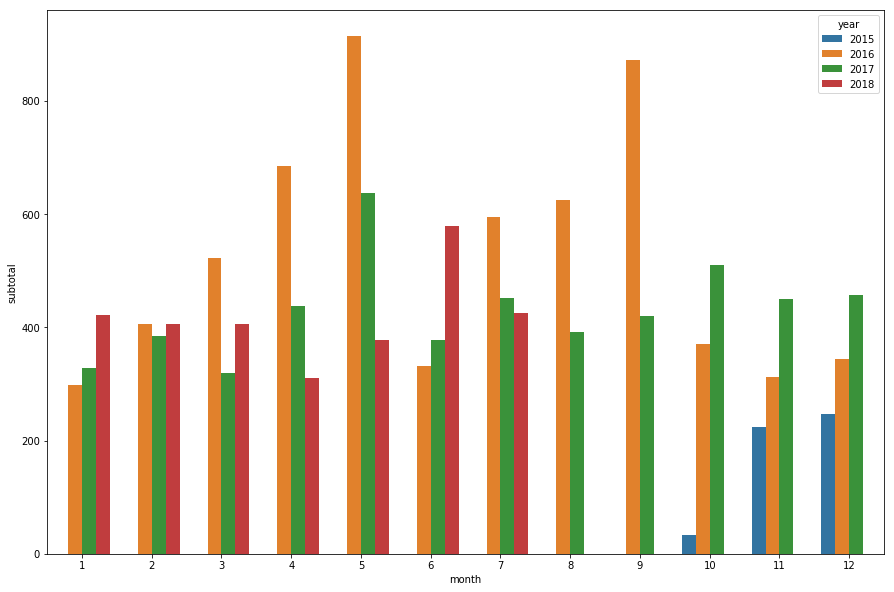

In [959]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="subtotal", hue="year",ci=None,data=df)

#### Monthly refund from 2015 to 2018

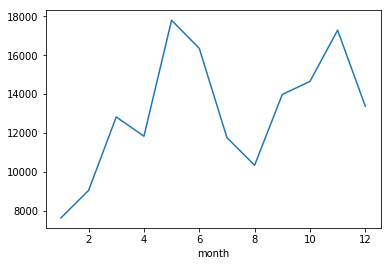

In [960]:
df.groupby('month')['refunded_amount'].sum().plot()

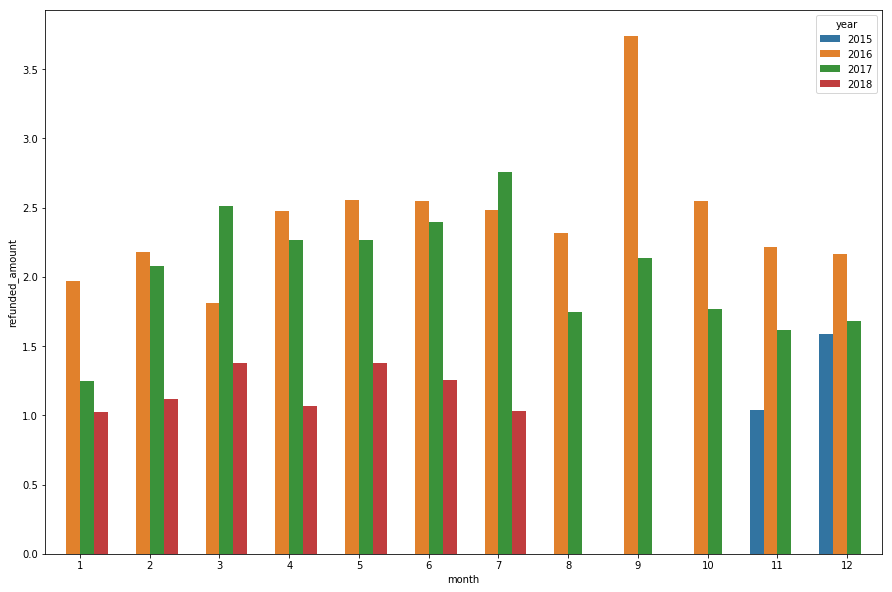

In [961]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="refunded_amount",hue="year",ci=None,data=df)

### Monthly revenue break down by year

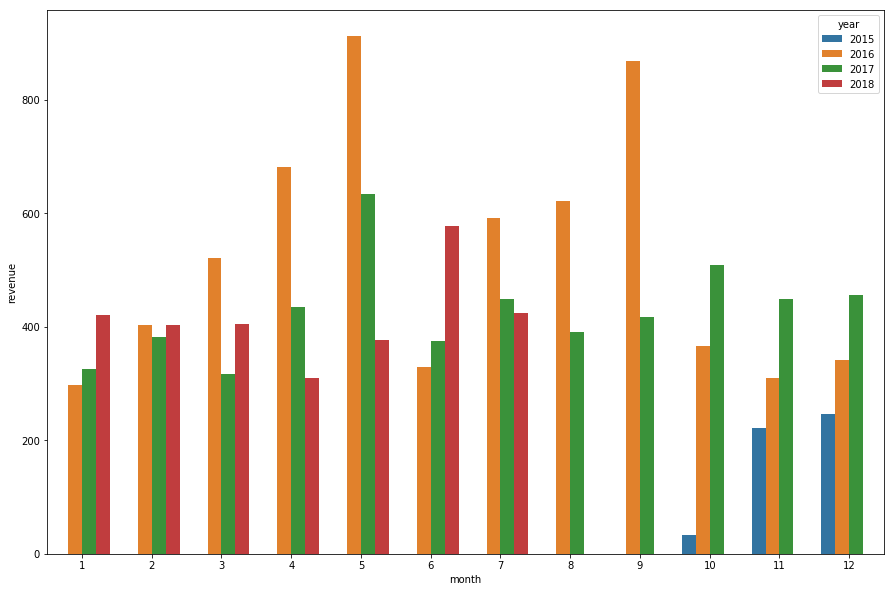

In [962]:
plt.figure(figsize=(15,10))
sns.barplot(x="month", y="revenue",hue="year",ci=None,data=df)

### Monthly revenue from 2015 to 2018

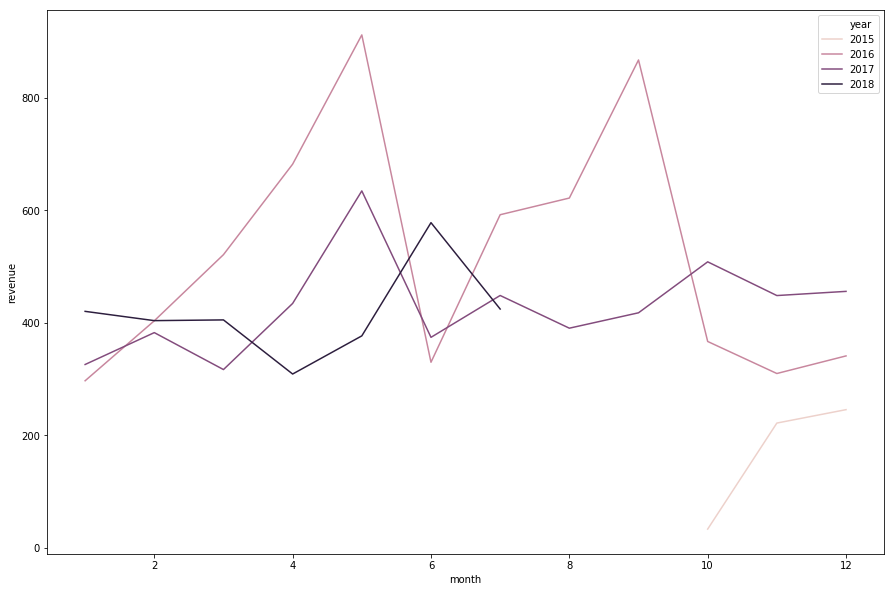

In [963]:
plt.figure(figsize=(15,10))
sns.lineplot(x="month", y="revenue", hue="year",ci=None,data=df)

#### Revenu breakdown by time and year

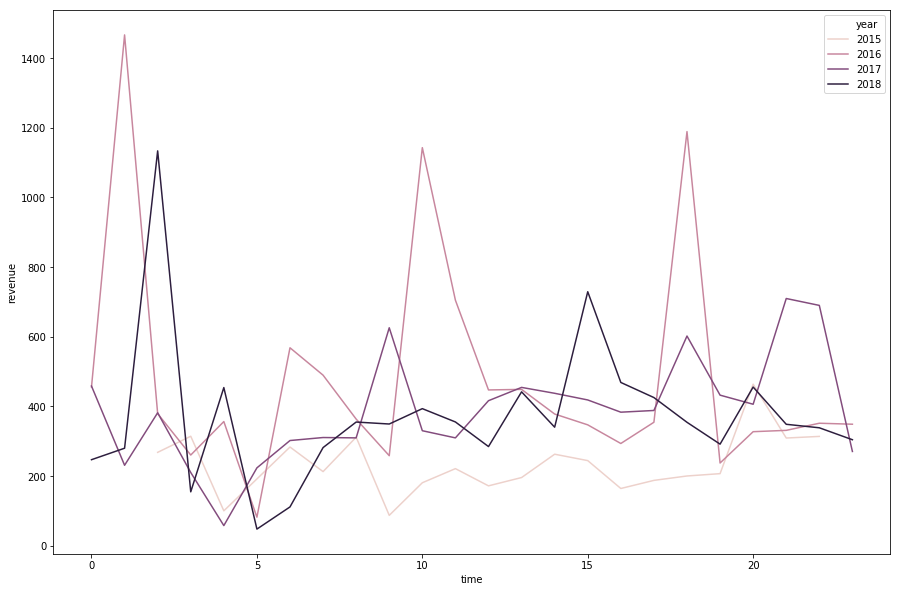

In [964]:
plt.figure(figsize=(15,10))
sns.lineplot(x="time", y="revenue", hue="year",ci=None,data=df)

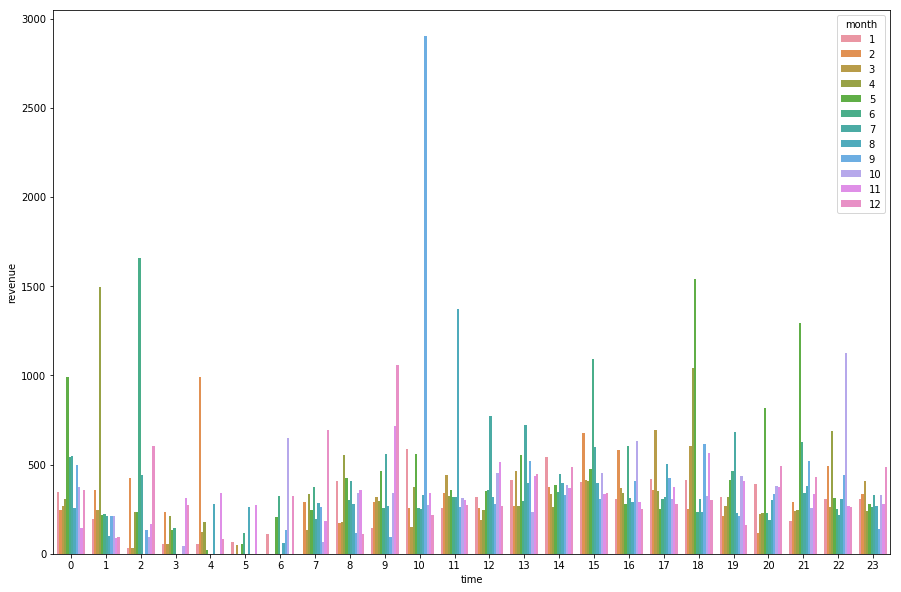

In [965]:
plt.figure(figsize=(15,10))
sns.barplot(x="time", y="revenue", hue="month",ci=None,data=df)

### Top line items

In [966]:
df['lineitem_name'].value_counts().sort_values(ascending = False).head(15)

urban geometric metal hoop earrings - gold               240
lightweight urban brass earrings - gold                  174
urban geometric metal hoop earrings - silver             164
lightweight urban brass earrings - silver                140
geometric metal hoop earrings - gold                     121
unisex leather bracelet                                  119
lightweight filigree earrings - gold                      98
urban geometric metal hoop earrings - rose gold           97
bohemian magnetic bracelet                                84
stering silver cubic zirconia studs earrings - silver     84
multi charm bohemian choker - black                       82
filigree earrings - gold                                  79
lightweight filigree earrings - rhodium                   78
lace choker                                               76
stering silver cubic zirconia studs earrings - gold       71
Name: lineitem_name, dtype: int64

### Top Sale States

In [967]:
geodf=df.groupby('shipping_province', as_index= False).sum().sort_values(by = 'subtotal', ascending = False).head(10)

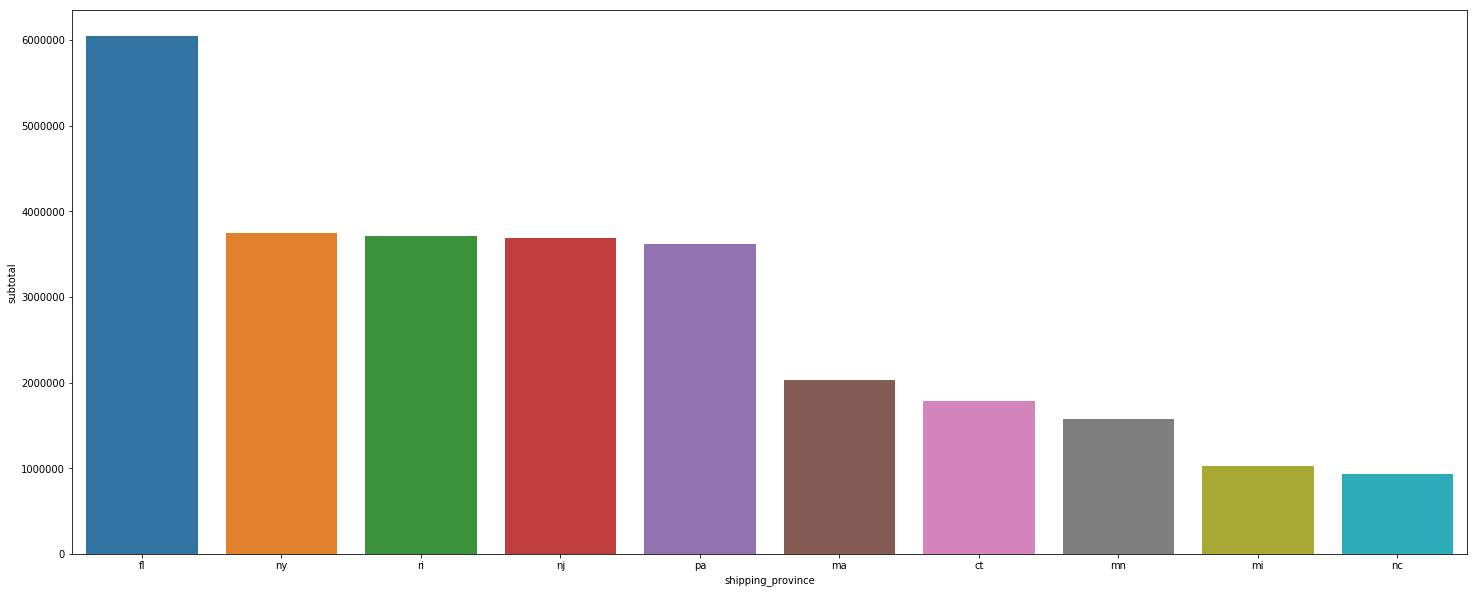

In [968]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'shipping_province', y = 'subtotal', data = geodf)

## Top 20 vendors that generates the most revenue

In [969]:
df.groupby(['vendor'])['revenue'].agg(sum).sort_values(ascending = False).head(20)

vendor
usjewelryhouse      11864553.83
cloie                3169052.72
romance              1851433.06
it's sense           1793498.51
dorothy              1657229.55
fresh                1482863.69
pomina               1167658.38
andante              1146551.93
crystal avenue       1144328.64
ruff-skch            1100171.05
core                  987701.02
us jewelry house      980768.42
moment                963104.57
jennifer              687874.39
stylist               636266.34
vera                  394397.24
tres jolie            374149.94
hush                  338023.89
premier               319453.10
fashion jewelry       311386.38
Name: revenue, dtype: float64

### Most expensive line item

In [970]:
df.groupby('lineitem_name')['revenue'].sum().sort_values(ascending = False).head(20)

lineitem_name
urban geometric metal hoop earrings - gold                    110855.01
lightweight urban brass earrings - gold                        77115.69
urban geometric metal hoop earrings - silver                   70222.70
lightweight urban brass earrings - silver                      63525.42
unisex leather bracelet                                        47084.76
urban geometric metal hoop earrings - rose gold                41372.72
geometric metal hoop earrings - gold                           41233.00
stering silver cubic zirconia studs earrings - gold            40626.92
lightweight filigree earrings - gold                           40249.54
bohemian magnetic bracelet                                     36498.17
stering silver cubic zirconia studs earrings - silver          35179.42
filigree earrings - gold                                       33635.54
lightweight filigree earrings - rhodium                        31199.12
multi strands glass beads sliding knot bracelet - 

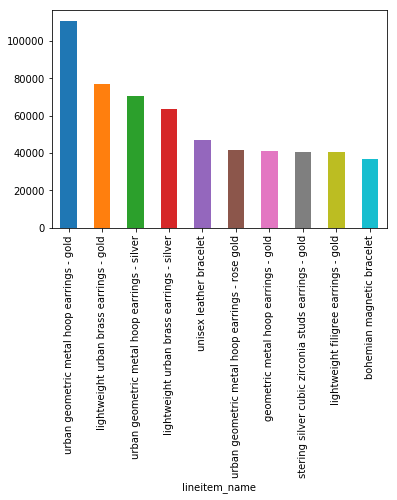

In [971]:
df.groupby('lineitem_name')['revenue'].sum().sort_values(ascending = False).head(10).plot(kind='bar')

In [972]:
df.category.value_counts()

earring        34861
necklace       30837
bracelet       10226
apparel         3574
ring            1839
accessories     1439
other            733
Name: category, dtype: int64

Text(0.5, 1.0, 'Most popular categories')

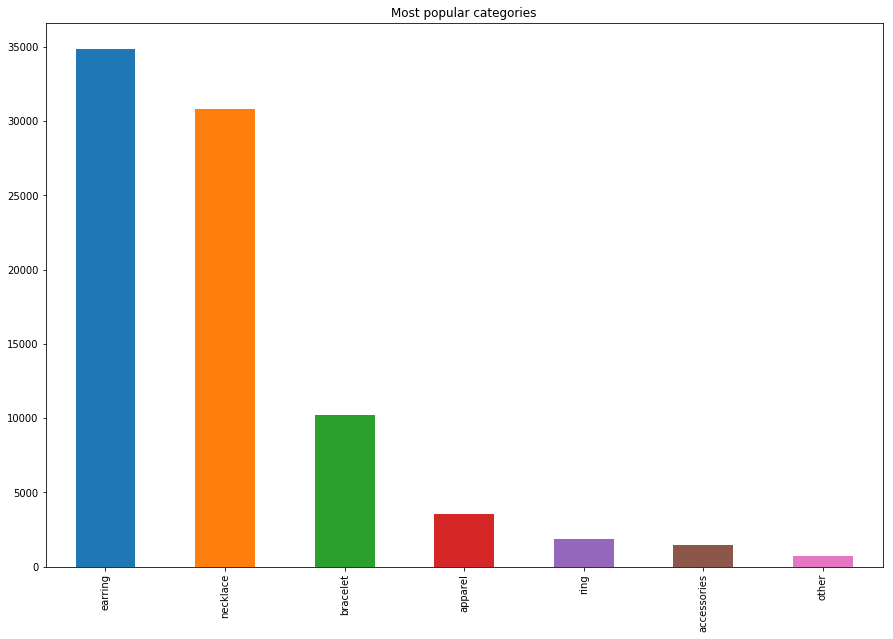

In [973]:
plt.figure(figsize=(15,10))
df.category.value_counts().plot(kind = 'bar')
plt.title('Most popular categories')

In [974]:
color = ['aqua', 'beige', 'beige-mint', 'beige/black', 'beige/grey', 'beige/pink', 'berry', 'bk-brwon', 'bk-grey', 'bk-ivory',
             'bk-l.brown', 'bk-multi', 'black', 'black-5', 'black-brown', 'black-ivory', 'black-jet', 'black-matte', 'black-pearl',
             'black-red', 'black-silver', 'black-white', 'black/gold', 'black/grey', 'black/silver', 'black/white', 'blue', 'blue-7',
             'blue-ivory', 'blue-topaz', 'blue/yellow', 'brown', 'camouflage', 'champagne', 'cobalt', 'coral', 'coral-pink', 'cream',
             'crystal-gold', 'dark', 'floral', 'fuchsia', 'fuschia', 'gd-blue', 'gd-pink', 'gd-turquoise', 'gold', 'gold-6', 'gold-7',
             'gold-8', 'gold-aqua', 'gold-black', 'gold-blue', 'gold-brown', 'gold-gold', 'gold-gray', 'gold-peach', 'gold-pink',
             'gold-silver', 'gold-two', 'gold-worn', 'gold/black', 'gold/clear', 'gold/silver', 'gold/worn', 'gray', 'green', 'green-topaz',
             'grey', 'grey-2', 'grey/black', 'grey/mint', 'h-pink', 'herringbone', 'holographic', 'ivory', 'ivory-3', 'ivory-beige',
             'ivory-multi', 'ivory/beige', 'ivory/brown', 'ivory/brown-6', 'ivory/grey', 'khaki', 'l-pink', 'lavender', 'lavender/blue',
             'marble', 'metallic', 'mint', 'mint/opal', 'mint/pink', 'multi', 'multi-gold', 'mustard', 'navy', 'navy-red', 'neon', 'nude',
             'olive', 'olive/brown', 'orange', 'orange/pink', 'pastel', 'peach', 'peach-1', 'peach-grey', 'peach/blue', 'pink', 'pink-3',
             'pink-4', 'pink-beige', 'pink/brown', 'pink/burgundy', 'pink/coral', 'pink/mint', 'pink/opal', 'polka', 'purple', 'purple-blue',
             'rainbow', 'red', 'red-pink', 'rose', 'rosey', 'sandy', 'silver', 'silver-6', 'silver-7', 'silver-8', 'silver-brown',
             'silver-clear', 'silver-gold', 'silver-gray', 'silver-jet', 'silver-rustic', 'silver-turquoise', 'silver-worn',
             'sterling\xa0silver', 'teal', 'teal/brown', 'tone-brown', 'tortoise-1', 'turquoise', 'turquoise-blue', 'turquoise-pink',
             'turquoise/blue', 'turquoise/brown', 'turquoise/coral', 'two-tone', 'violet', 'watercolor', 'white', 'white-brown',
             'white-grey', 'white/brown', 'yellow', 'yellow/green']

def word_finder(str, words):
    return ([w for w in str if w in words])

df['color'] = df['lineitem_name'].apply(lambda x: x.lower().split()).apply(lambda x: word_finder(x, color))

new_color_columns = ['color1', 'color2', 'color3', 'color4']
color_df = pd.DataFrame(df['color'].values.tolist(), columns=new_color_columns)
    

In [975]:
df = pd.concat([df, color_df], axis=1, copy=False)

df.drop('color', axis=1, inplace=True)


In [976]:
for color_col in new_color_columns:
    df[color_col].fillna('None', inplace=True)
    df[color_col].replace('gray', 'grey', inplace=True)
    df[color_col].replace('grey/black', 'black/grey', inplace=True)
    df[color_col].replace('bk-grey', 'black/grey', inplace=True)
    df[color_col].replace('fuschia', 'fuchsia', inplace=True)

In [977]:
df.color1.value_counts().sort_values(ascending = False).head(20)

None         29740
gold         11761
multi         7696
silver        7370
black         4280
blue          2523
grey          2441
rose          2373
turquoise     1895
ivory         1801
pink          1789
brown         1517
white         1497
mint          1073
peach          884
red            717
beige          675
navy           588
green          584
marble         478
Name: color1, dtype: int64

In [978]:
colordf = df.groupby('color1').sum()['subtotal'].sort_values(ascending = False).head(15)
colordf

color1
None         12800179.74
gold          5116456.59
silver        3439337.29
multi         3280720.41
black         1935211.87
grey          1118823.03
blue          1056440.83
rose          1047861.95
turquoise      874805.72
pink           853830.02
ivory          786496.34
brown          740280.63
white          684163.12
mint           491322.43
peach          397880.31
Name: subtotal, dtype: float64

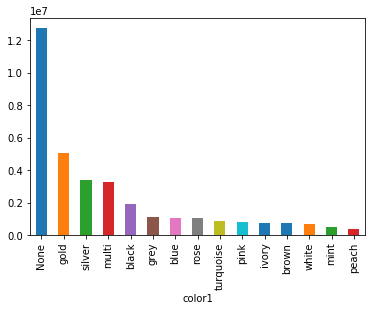

In [979]:
df.groupby('color1').sum()['revenue'].sort_values(ascending = False).head(15).plot(kind = 'bar')

Text(0.5, 1.0, 'Most popular colors')

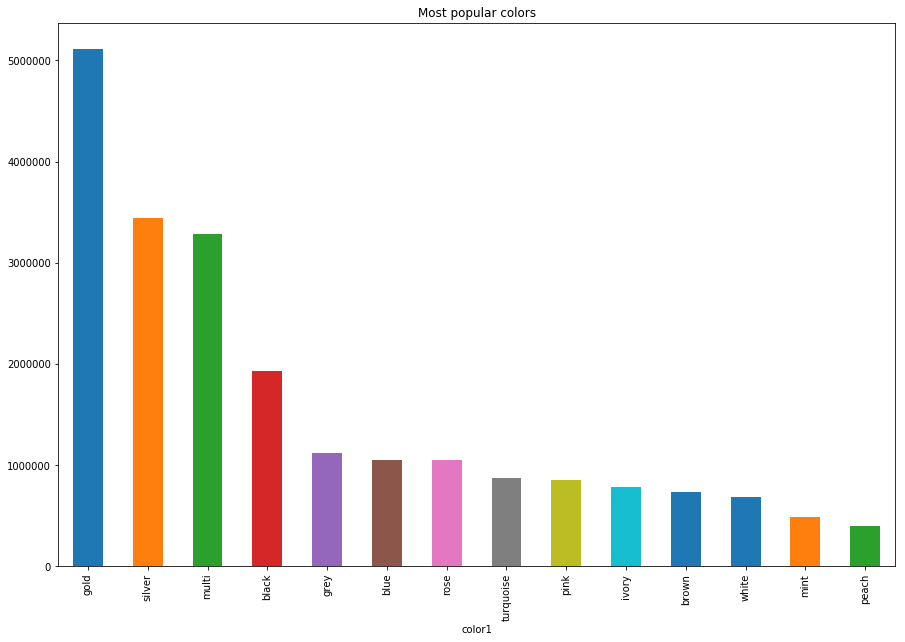

In [980]:
plt.figure(figsize=(15,10))
colordf[1:].plot(kind = 'bar')
plt.title('Most popular colors')

In [981]:
headers = df.dtypes.index
headers

Index(['Unnamed: 0', 'name', 'financial_status', 'paid_at',
       'fulfillment_status', 'accepts_marketing', 'currency', 'subtotal',
       'shipping', 'taxes', 'total', 'discount_code', 'discount_amount',
       'shipping_method', 'created_at', 'lineitem_quantity', 'lineitem_name',
       'lineitem_price', 'lineitem_compare_at_price', 'lineitem_sku',
       'lineitem_fulfillment_status', 'shipping_street', 'shipping_address1',
       'shipping_company', 'shipping_city', 'shipping_zip',
       'shipping_province', 'shipping_country', 'notes', 'cancelled',
       'payment_method', 'refunded_amount', 'vendor', 'risk_level', 'source',
       'category', 'revenue', 'month', 'year', 'day', 'time', 'day_of_week',
       'color1', 'color2', 'color3', 'color4'],
      dtype='object')

In [982]:
material = ['Onyx', 'Crystal', 'Rhinestone', 'Zirconia', 'Acetate', 'Precious', 'Glass', 'Stone', 'Diamond', 'Lucite', 'Metal', 'Acrylic',
                'Straw', 'Rhodium', 'Filigree', 'Pearl', 'Topaz', 'Leather', 'Fabric', 'Wooden', 'Mirror', 'Aluminium', 'Bamboo',
                'Embroidery', 'Wood', 'Semi-Precious', 'Stones', 'Fur', 'Snake', 'Reptile', 'Studded', 'Cotton', 'Suede', 'Garnet',
                'Geode', 'Woven', 'Amethyst', 'Abalone', 'Sapphire', 'Pebble', 'zirconia', 'Gem', 'Rhineston', 'Silk', 'Amber',
                'Emerald', 'Zircon', 'Aquamarine', 'Linen', 'Ruby', 'Viscose', 'Gold-Rhodium', 'Rhodium/Clear', 'Plastic', 'Steel',
                'Rhodium-Gold', 'Gemstones', 'Velvet', 'Rhodium-Pearl', 'Silicone', 'Rhodium-Sapphire',
                'Hematite-Silver', 'Hematite-Gold', 'Rhodium-Multi', 'Amethyst-Aurore', 'Crystal-Rhodium', 'Gold-Hematite-Brown',
                'Wooden-Fabric']

In [983]:
df['material'] = df['lineitem_name'].str.extract('({})'.format('|'.join(material)), flags=re.IGNORECASE, expand=False).str.lower().fillna('')



In [984]:
df['material'].replace('', 'none', inplace=True)

In [985]:
material_df = df['material'].value_counts().head(15)

Text(0.5, 1.0, 'Most popular materials')

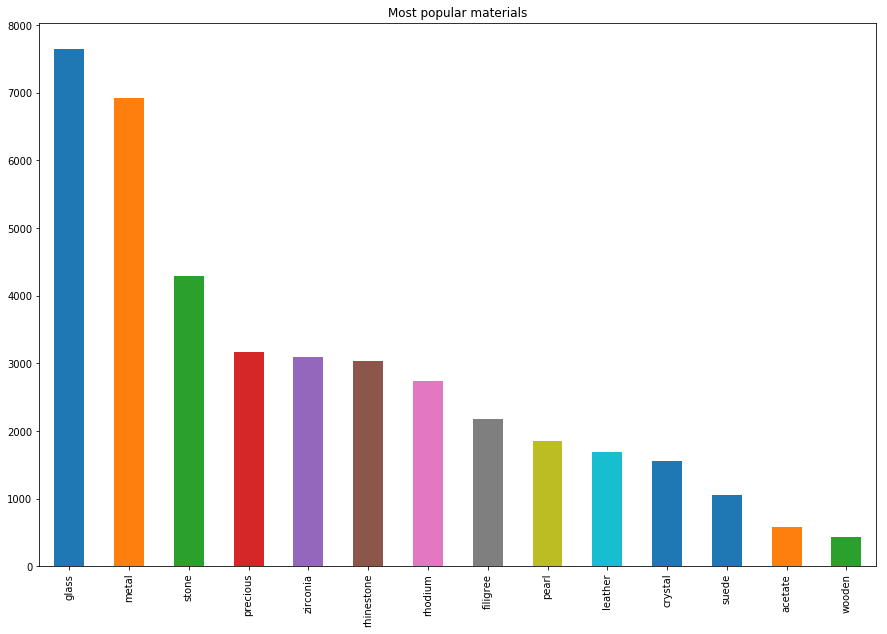

In [986]:
plt.figure(figsize=(15,10))
material_df[1:].plot(kind = 'bar')
plt.title('Most popular materials')

In [987]:
df_color = df.groupby(['year', 'color1'], as_index = False)['revenue'].sum().sort_values(ascending = False, by = ['revenue']).head(20)
df_color

,year,color1,revenue
63,2017.0,None,6382117.22
1,2016.0,None,3611549.18
133,2018.0,None,2497735.32
86,2017.0,gold,2167849.47
164,2018.0,gold,1697636.14
119,2017.0,silver,1642157.41
102,2017.0,multi,1349944.49
18,2016.0,gold,1230242.51
34,2016.0,multi,1037507.54
220,2018.0,silver,1024054.38


In [1001]:
df_color= df[(df['color1'] == 'gold')|(df['color1'] == 'silver')|(df['color1'] == 'multi') | (df['color1'] == 'black')|(df['color1'] == 'rose')]

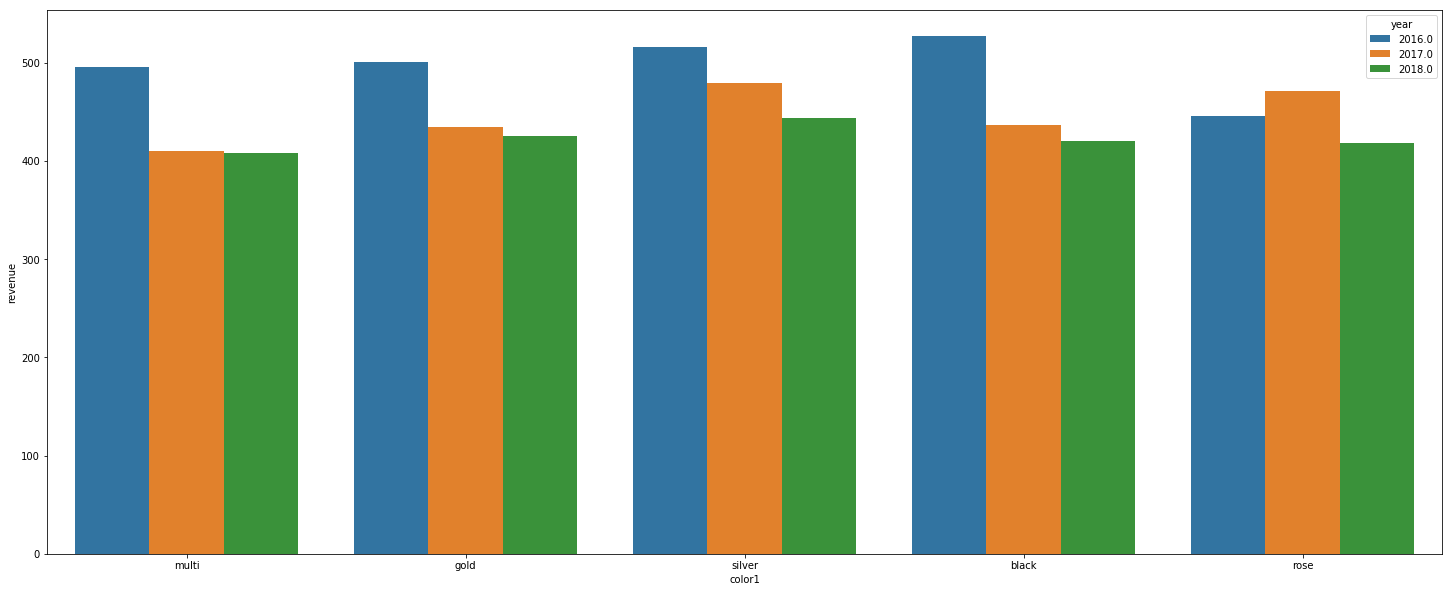

In [1003]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'color1', y = 'revenue',hue = 'year',ci=None, data = df_color)